<a href="https://colab.research.google.com/github/nurfnick/Data_Viz/blob/main/24_Amounts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize Amounts

To get started in visualizing, we'll look at one of the simplest ideas, single quantaties.  Let's grab some data too!

In [ ]:
import pandas as pa

df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/iris.csv')

I'll give a small bar chart of the means of the different Classes of flowers.

In [ ]:
df.groupby('Class').SepalLength.agg('mean')

Class
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: SepalLength, dtype: float64

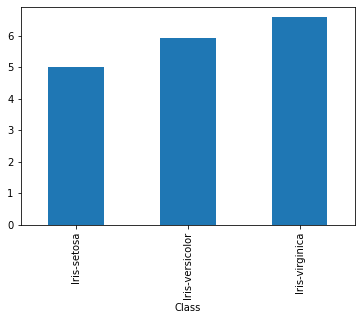

In [ ]:
df.groupby('Class').SepalLength.agg('mean').plot(kind = 'bar')

There are lots of options some of which we should be using reguarly.  A title is always nice

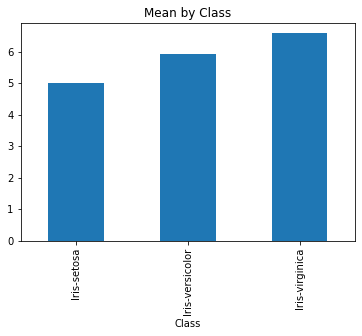

In [ ]:
df.groupby('Class').SepalLength.agg('mean').plot(kind = 'bar', title = 'Mean by Class')

A vertical description on what the $y$ axis represents should not be forgotten!

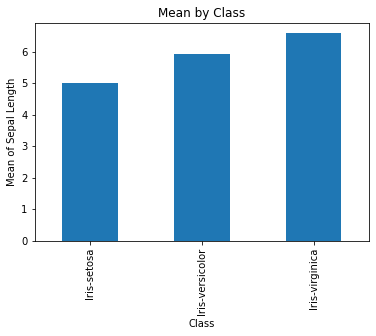

In [ ]:
df.groupby('Class').SepalLength.agg('mean').plot(kind = 'bar',
                                                 title = 'Mean by Class', 
                                                 ylabel= 'Mean of Sepal Length')

One of the complaints about a graphic like this is the length of the class titles.  It takes up a lot of vertical space.  With a `barh` you can change the orientation of the bars.

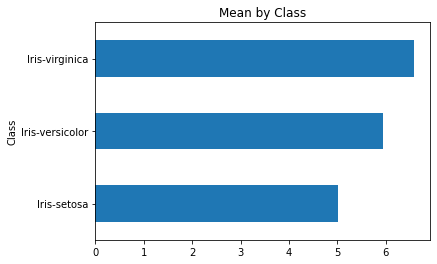

In [ ]:
df.groupby('Class').SepalLength.agg('mean').plot(kind = 'barh',
                                                 title = 'Mean by Class', 
                                                 ylabel= 'Mean of Sepal Length')

I couldn't get the label of the values to appear, maybe you can?

If there are lots of values, don't use bars!  Let's see this with a different dataset.

In [ ]:
df2 = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/Activity_Dataset_V1.csv')

In the following graph it is very difficult to follow the data points across.  

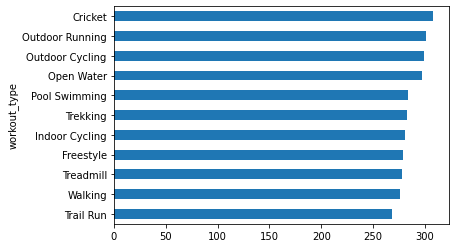

In [ ]:
df2.groupby('workout_type').calories.agg('mean').sort_values(ascending = True).plot(kind = 'barh')

To clear this up you could use a point instead of a bar!

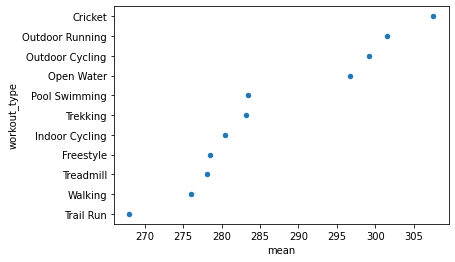

In [ ]:
df2.groupby('workout_type').calories.agg(['mean']).sort_values(by = 'mean',ascending = True).reset_index().plot.scatter(x = 'mean', y = 'workout_type')

This creates other issues in that the origin of the figure is not zero.  To fix that, we simply require that the x limits go from 0 to 310.

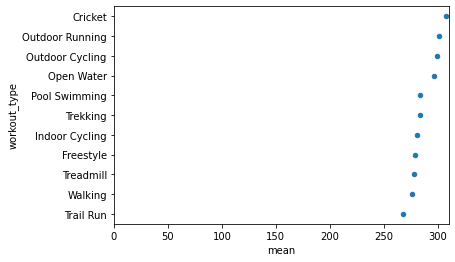

In [ ]:
df2.groupby('workout_type').calories.agg(['mean']).sort_values(by = 'mean',ascending = True).reset_index().plot.scatter(x = 'mean', y = 'workout_type', xlim = [0,310])

All the workout types are giving us about the same bang for our buck, at least in mean calories.

It might also be nice to see the numbers presented with the data.  This is esspecially nice for a small number of quantities.

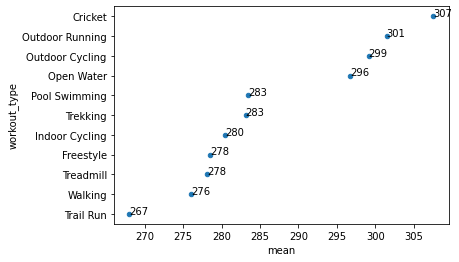

In [ ]:
ax = df2.groupby('workout_type').calories.agg(['mean']).sort_values(by = 'mean',ascending = True).reset_index().plot.scatter(x = 'mean', y = 'workout_type')#this made the same graph as above.

for i,k in enumerate(df2.groupby('workout_type').calories.agg(['mean']).sort_values(by = 'mean',ascending = True).reset_index()['mean']): #here I loop through the values, k, and indicies ,i.
  ax.annotate(str(int(k)),[k,i])

In [ ]:
means = df2.groupby('workout_type').calories.agg(['mean']).sort_values(by = 'mean',ascending = False)

In [ ]:
means = pa.DataFrame(means)
for k in means['mean']:
  print(k)

307.5483870967742
301.4691358024691
299.1294117647059
296.74725274725273
283.4148936170213
283.1276595744681
280.45
278.5520833333333
278.14285714285717
276.0408163265306
267.96666666666664


In [ ]:
means['mean']

workout_type
Cricket            307.548387
Outdoor Running    301.469136
Outdoor Cycling    299.129412
Open Water         296.747253
Pool Swimming      283.414894
Trekking           283.127660
Indoor Cycling     280.450000
Freestyle          278.552083
Treadmill          278.142857
Walking            276.040816
Trail Run          267.966667
Name: mean, dtype: float64